In [10]:
# author : Jing
# date: May 9th 2019
# function: merge two files and save it 

from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [71]:
# gc_path generated by clinical_dataprocessing
import numpy as np

barpath = "./gene_clinical_burden_barcode.csv"
outbarpath = "./gene_clinical_burden.csv"

key = "bcr_patient_barcode"
gc_path = "~/Box/Huang_lab/manuscripts/SomaticImmunePrediction/analysis/codePython/gene_clinical_barcode.csv"
gc_ = pd.read_csv(gc_path, dtype = 'object')

nonsynonymous_path = "~/Box/Huang_lab/Huang_lab_data/TCGA_PanCanAtlas_2018/MC3_Ellrott_CellSys2018/TCGA_Tumor_Sample_patient_uniq_somatic_mutation_burden.tsv"
nonsynonymous_data = pd.read_csv(nonsynonymous_path, dtype = 'object', sep = '\t')

gc_nonsynonymous = pd.merge(nonsynonymous_data, gc_, how = 'inner', on = ['bcr_patient_barcode'])


In [73]:
drop_col = ['Tumor_Sample_Barcode','somatic_mutation_count','driver_count','loose_driver_count', key]
drop_col_bar = ['Tumor_Sample_Barcode','somatic_mutation_count','driver_count','loose_driver_count']

gc_data = gc_nonsynonymous.drop(drop_col, axis=1)
gc_data_bar = gc_nonsynonymous.drop(drop_col_bar, axis=1)


gc_data.to_csv(outbarpath, index = False)
gc_data_bar.to_csv(barpath, index = False)

print(gc_data.shape)
print(gc_data_bar.shape)

(7661, 339)
(7661, 340)


In [69]:
gc_data.tail

<bound method NDFrame.tail of      nonsynonymous_count FEMALE MALE ACC BLCA BRCA CESC CHOL COAD ESCA  ...  \
0                     44      0    1   0    0    0    0    0    0    0  ...   
1                     28      0    1   0    0    0    0    0    0    0  ...   
2                     62      0    1   0    0    0    0    0    0    0  ...   
3                     50      1    0   0    0    0    0    0    0    0  ...   
4                    100      0    1   0    0    0    0    0    0    0  ...   
5                     50      0    1   0    0    0    0    0    0    0  ...   
6                     45      0    1   0    0    0    0    0    0    0  ...   
7                     54      0    1   0    0    0    0    0    0    0  ...   
8                     57      0    1   0    0    0    0    0    0    0  ...   
9                    134      1    0   0    0    0    0    0    0    0  ...   
10                    15      1    0   0    0    0    0    0    0    0  ...   
11                    

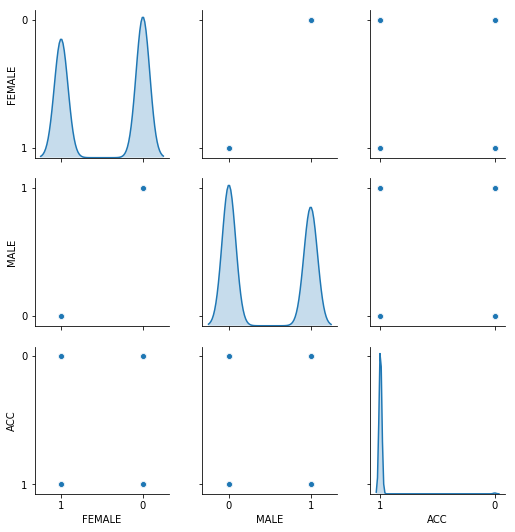

In [47]:
columns = gc_data.columns.values
#for x in columns:
#    print(x, end=' ')
sns.pairplot(gc_data[columns[0:3]], diag_kind="kde")

In [63]:
gc_data['nonsynonymous_count'] = pd.to_numeric(gc_data['nonsynonymous_count'])
# normalization
gc_data['nonsynonymous_count']  = (gc_data['nonsynonymous_count'] - gc_data['nonsynonymous_count'].mean())/gc_data['nonsynonymous_count'].std()

#sum(gc['nonsynonymous_count'])

In [66]:
gc_data.tail()
gc_data = gc_.values.astype(float)
n = gc_data.shape[0]
d = gc_data.shape[1]


x = gc_data[:,:-2,-1]
y = gc_data[:,-2]


,FEMALE,MALE,ACC,BLCA,BRCA,CESC,CHOL,COAD,ESCA,GBM,...,ZCCHC12,ZFHX3,ZFP36L1,ZFP36L2,ZMYM2,ZMYM3,ZNF133,ZNF750,Leukocyte Fraction,nonsynonymous_count
7656,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0431896606167899,-0.257335
7657,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0205992480601613,-0.243393
7658,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0210805395109695,-0.247683
7659,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0246653148045858,-0.257335
7660,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0163179670568617,0.150221
